## PUC Minas
### Pós-Graduação em Ciência de Dados e Big Data
#### Avaliação Final - Modelagem e Preparação de Dados para Aprendizado de Máquina

**Aluno:**

Vitor Cunha

### Base de Dados

**Descriçao de Atributos**

- age: idade
- workclass: classe de trabalho
- education: nível educacional
- education-num: anos de educação
- marital-status: estado civil
- occupation: profissão
- race: etnia
- sex: gênero
- capital-gain: ganho de capital
- capital-loss: perda de capital
- hours-per-week: horas de trabalho por semana
- native-country: país de origem

**Contexto dos Dados**

O dataset apresenta dados de um problema de classificação onde o objetivo é prever se a pessoa da observação ganha mais de 50k dólares por ano ou não.

## Bibliotecas

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dados**

In [90]:
# Carregue o dataset fornecido ('adult_final.csv')
df = pd.read_csv("./adult_final.csv")

**1. Apresente o tipo das variáveis.**

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  31978 non-null  object
 12  target          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


**2.Apresente de forma gráfica e numérica a análise exploratória das variáveis _education_ e _race_.**

In [92]:
df["education"].value_counts(normalize=True)

education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: proportion, dtype: float64

In [93]:
df["race"].value_counts(normalize=True)

race
White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: proportion, dtype: float64

In [94]:
df["education"].isna().sum(), df["race"].isna().sum()

(0, 0)

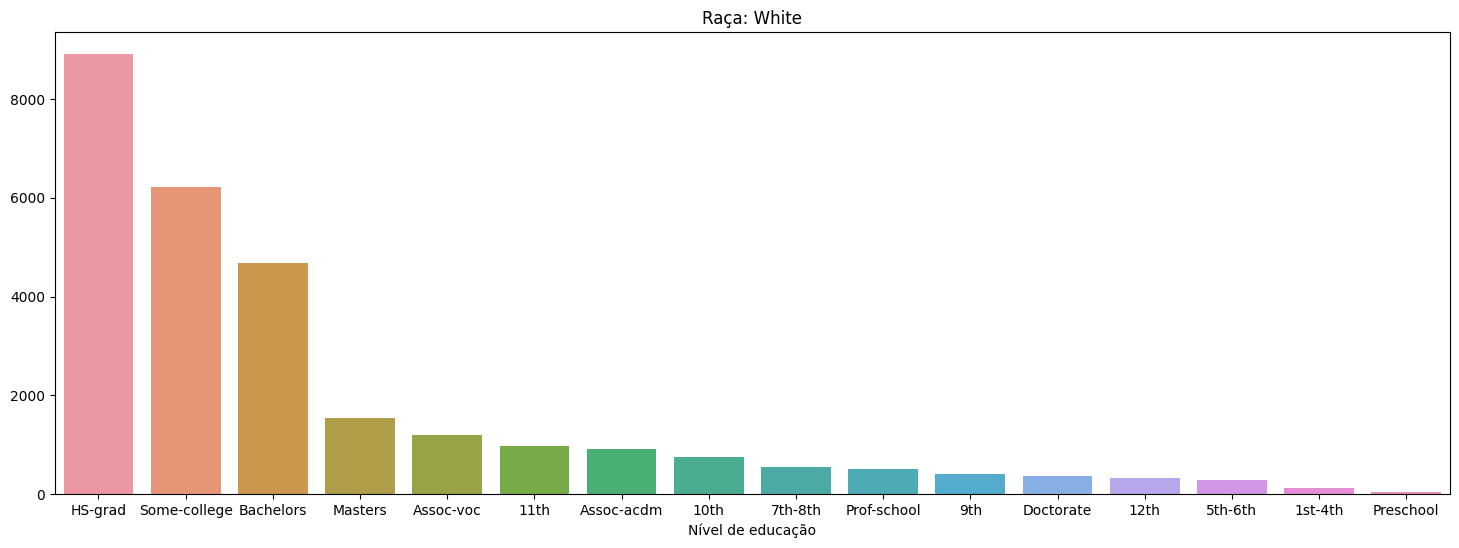

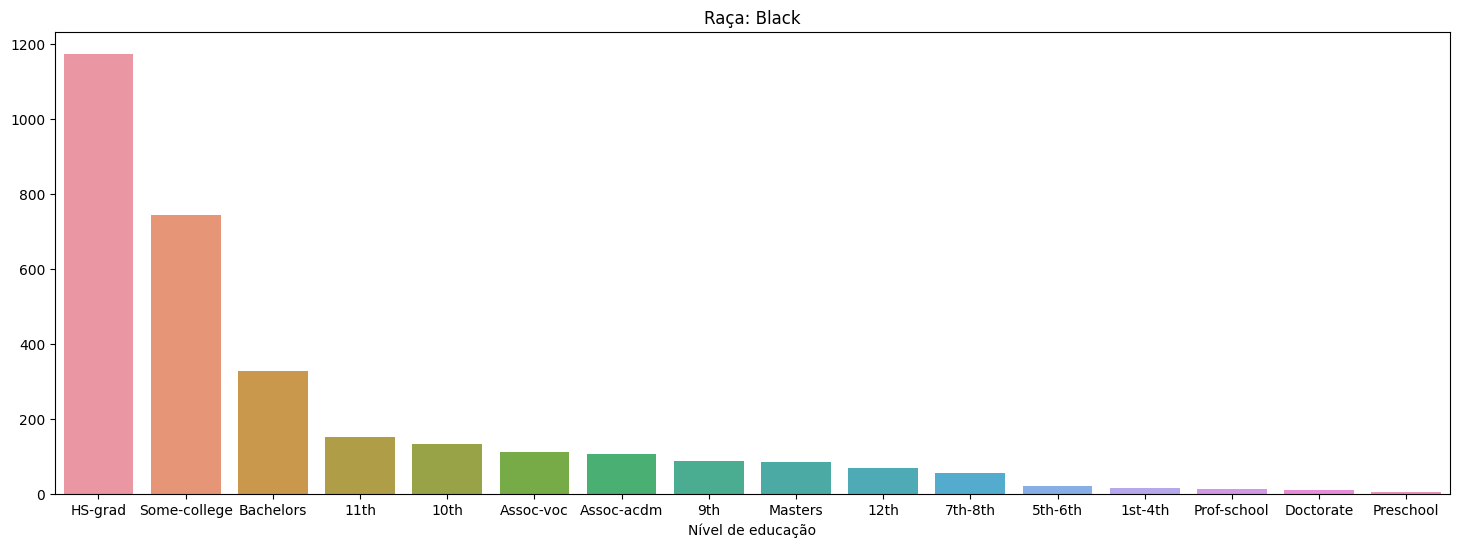

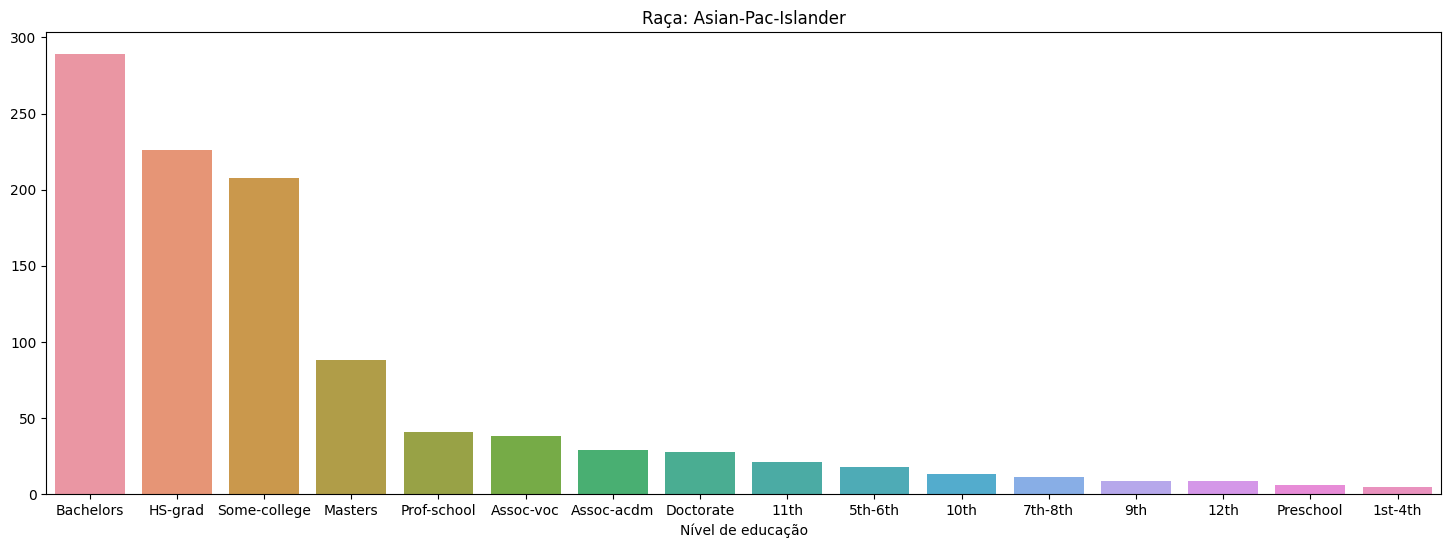

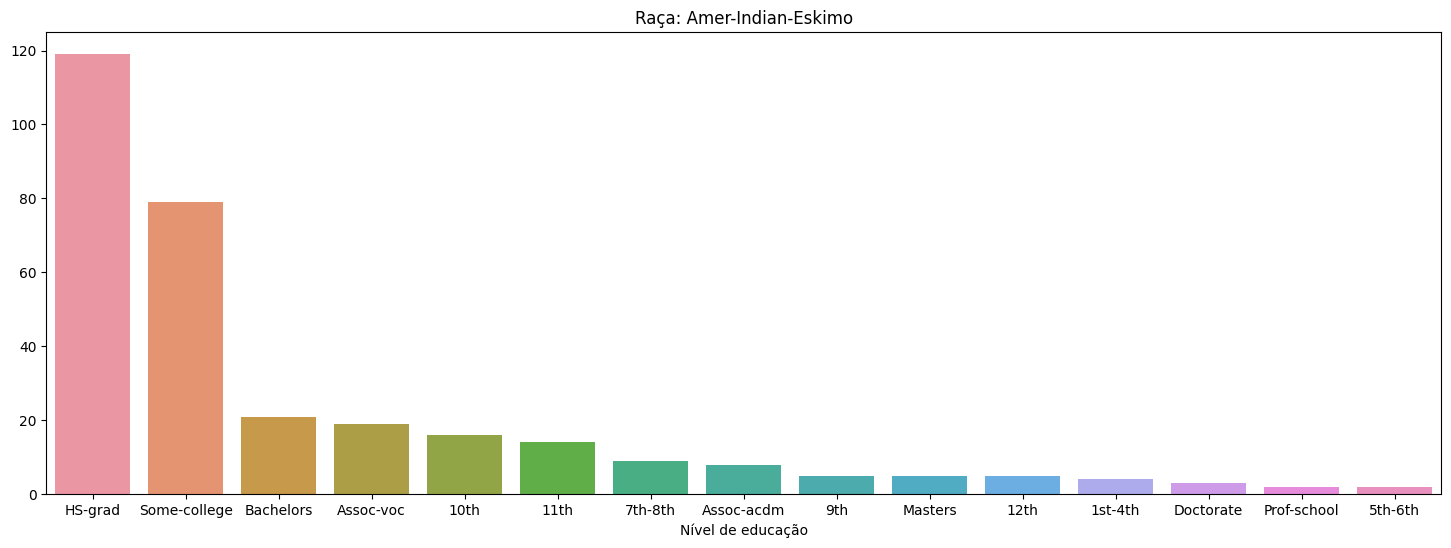

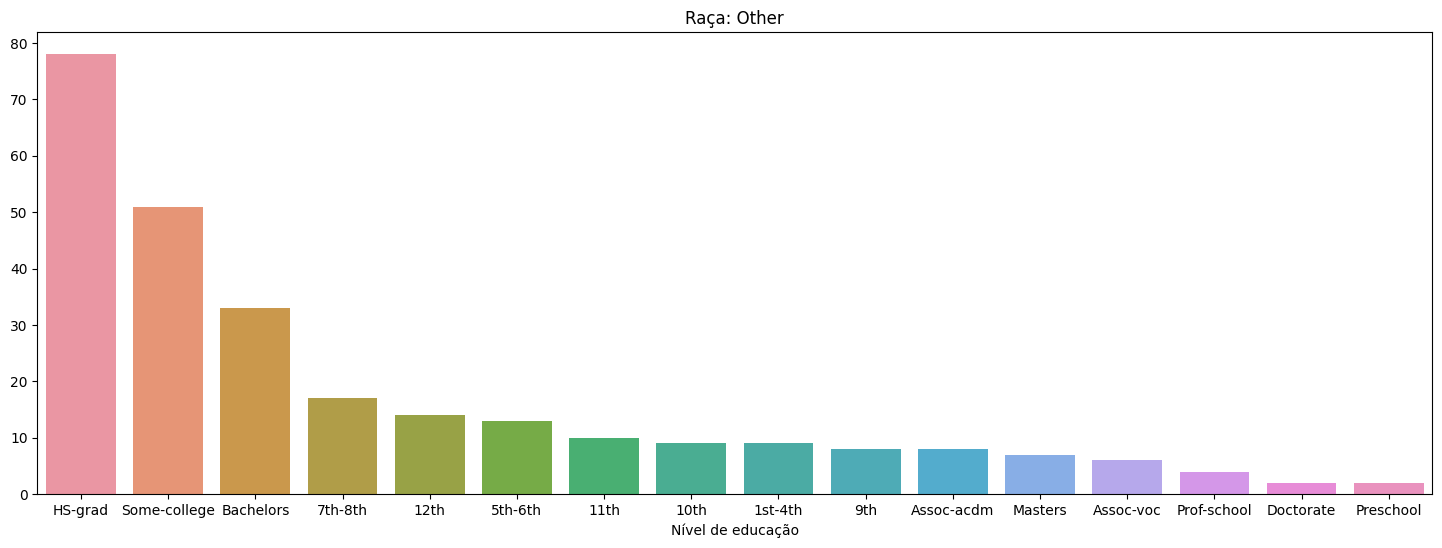

In [95]:
for race in df["race"].unique():
    subset = df[df["race"] == race]
    plt.figure(figsize=(18, 6))
    sns.countplot(data=subset, x='education', order=subset['education'].value_counts().index)
    plt.title(f"Raça: {race}")
    plt.xlabel("Nível de educação")
    plt.ylabel("")
    plt.show()

**3. Apresente as métricas estatísticas (média, moda, etc.) e histograma das variáveis _age_ e _hours-per-week_.**

In [96]:
print(f"Moda 'age': {df['age'].mode().values[0]}")
print(f"Moda 'hours-per-week': {df['hours-per-week'].mode().values[0]}")
df[["age", "hours-per-week"]].describe().T

Moda 'age': 36
Moda 'hours-per-week': 40


,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


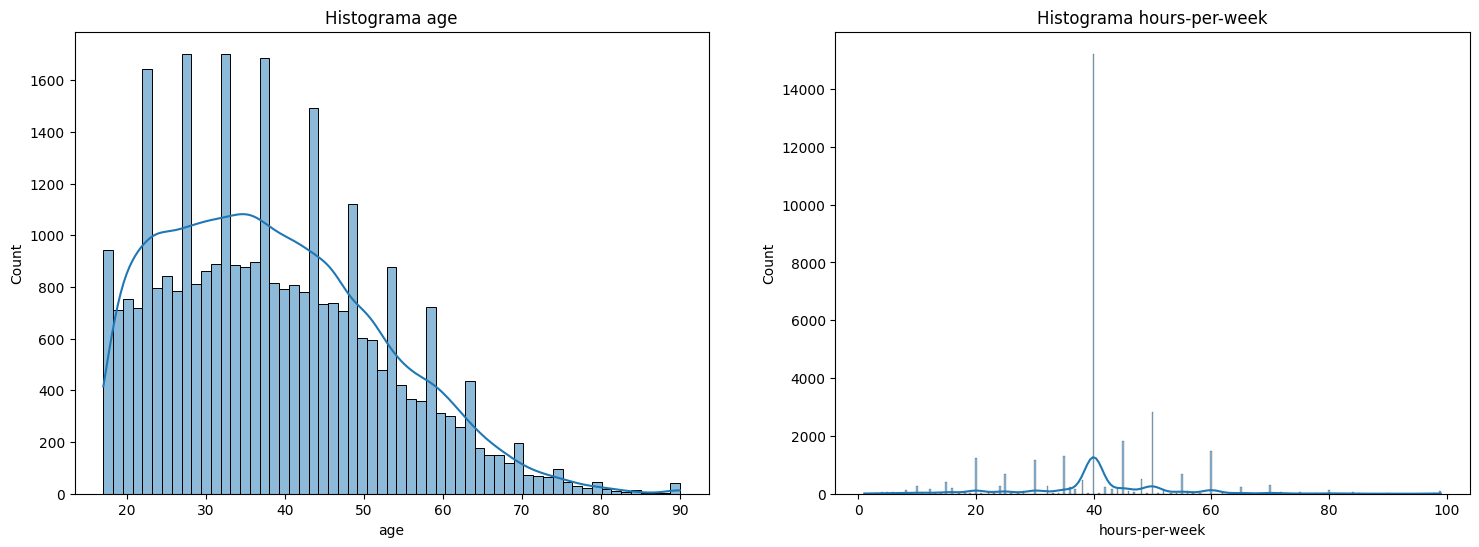

In [97]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
ax = ax.ravel()
sns.histplot(df["age"], ax=ax[0], kde=True)
sns.histplot(df["hours-per-week"], ax=ax[1], kde=True)
ax[0].set_title("Histograma age")
ax[1].set_title("Histograma hours-per-week")
plt.show()

**4. Apresente 2 análises multivaridas entre variáveis a sua escolha.**

In [98]:
pd.pivot_table(data=df, index="workclass", columns="education", aggfunc=["size"], fill_value=0)

size                                                     
education        10th 11th 12th 1st-4th 5th-6th 7th-8th  9th Assoc-acdm   
workclass                                                                 
Federal-gov         6    9    5       0       1       2    3         55  \
Local-gov          31   36   19       4       9      28   23         88   
Never-worked        2    1    0       0       0       1    0          0   
Private           695  923  333     136     266     424  387        729   
Self-emp-inc       19   14    7       2       4      14   10         35   
Self-emp-not-inc   67   60   19      13      19      94   34         71   
State-gov          13   14   10       1       4      10    6         41   
Without-pay         0    0    0       0       0       1    0          1   

                                                                           
education        Assoc-voc Bachelors Doctorate HS-grad Masters Preschool   
workclass                                                                  
Federal-gov             38       212        16     263      67         0  \
Local-gov               86       477        27     503     342         4   
Never-worked             0         0         0       1       0         0   
Private               1005      3551       181    7780     894        41   
Self-emp-inc            38       273        35     279      79         0   
Self-emp-not-inc       108       399        50     866     124         0   
State-gov               46       270        89     268     169         1   
Without-pay              0         0         0       9       0         0   

                                           
education        Prof-school Some-college  
workclass                                  
Federal-gov               29          254  
Local-gov                 29          387  
Never-worked               0            2  
Private                  257         5094  
Self-emp-inc              81          226  
Self-emp-not-inc         131          486  
State-gov                 31          325  
Without-pay                0            3

In [99]:
pd.pivot_table(data=df, index="sex", columns="race", values="hours-per-week", aggfunc=["mean"], fill_value=0)

mean                                                    
race   Amer-Indian-Eskimo Asian-Pac-Islander      Black      Other      White
sex                                                                          
Female          36.579832          37.439306  36.834084  35.926606  36.296691
Male            42.197917          41.468975  39.997451  41.851852  42.668822

**5. Apresente a soma de _NaN_ de cada coluna da base de dados.**

In [100]:
df.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

**6. Trate os _NaN_ de todas as colunas como achar conveniente (explique). Em seguida, mostre que nenhuma coluna apresenta _NaN_ ao final do processo.**

Colunas "workclass" e "occupation"

In [101]:
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [102]:
df["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

A coluna "occupation" possui mais nulos que a "workclass", e essa contém um valor pra quem nunca trabalhou. A diferença entre os nulos dessas colunas pode estar no fato de pessoas preenchendo a coluna "workclass" com o valor "never-worked" e não tendo opção para preencher a coluna "occupation"

In [103]:
df[df["workclass"] == "Never-worked"]

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
5361,18,Never-worked,10th,6,Never-married,NaN,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,7th-8th,4,Divorced,NaN,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,10th,6,Never-married,NaN,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,11th,7,Never-married,NaN,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,Some-college,10,Never-married,NaN,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,Some-college,10,Never-married,NaN,White,Male,0,0,4,United-States,<=50K


In [104]:
filtro = (df["workclass"].notna()) & (df["occupation"].isna())
df[filtro]

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
5361,18,Never-worked,10th,6,Never-married,NaN,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,7th-8th,4,Divorced,NaN,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,10th,6,Never-married,NaN,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,11th,7,Never-married,NaN,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,Some-college,10,Never-married,NaN,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,Some-college,10,Never-married,NaN,White,Male,0,0,4,United-States,<=50K


Como absolutamente toda vez que o valor "Never-worked" aparece a coluna "occupation" possui valor nulo, podemos preencher esses nulos com um novo valor para a coluna, como por exemplo "None"

In [105]:
df.loc[filtro, "occupation"] = "None"

In [106]:
df[df["workclass"] == "Never-worked"]

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
5361,18,Never-worked,10th,6,Never-married,None,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,7th-8th,4,Divorced,None,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,10th,6,Never-married,None,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,11th,7,Never-married,None,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,Some-college,10,Never-married,None,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,HS-grad,9,Married-civ-spouse,None,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,Some-college,10,Never-married,None,White,Male,0,0,4,United-States,<=50K


In [107]:
df.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1836
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

Com isso, "workclass" e "occupation" possuem o mesmo número de nulos

Como as 3 colunas com nulos são colunas categóricas, e nenhuma outra coluna pode indicar algum valor para elas, podemos preencher os nulos mantendo a proporção inicial dos dados

**Coluna "workclass": Valor "Never-worked" não pode ser utilizado para preencher nulos**

In [108]:
df["workclass"].value_counts(normalize=True)

workclass
Private             0.738682
Self-emp-not-inc    0.082701
Local-gov           0.068120
State-gov           0.042246
Self-emp-inc        0.036322
Federal-gov         0.031245
Without-pay         0.000456
Never-worked        0.000228
Name: proportion, dtype: float64

In [109]:
np.random.seed(42)
valores = ['Private'] * int(0.73 * 1836) + ['Self-emp-not-inc'] * int(0.08 * 1836) + ['Local-gov'] * int(0.07 * 1836) + ['State-gov'] * int(0.04 * 1836) + ['Self-emp-inc'] * int(0.04 * 1836) + ['Federal-gov'] * int(0.04 * 1836)
while len(valores) < 1836:
    valores.append('Private')
np.random.shuffle(valores)

In [110]:
nulos_workclass = df['workclass'].isna()
df.loc[nulos_workclass, 'workclass'] = valores

In [111]:
df["workclass"].isna().sum()

0

In [112]:
df["workclass"].value_counts(normalize=True)

workclass
Private             0.738276
Self-emp-not-inc    0.082522
Local-gov           0.068210
State-gov           0.042106
Self-emp-inc        0.036516
Federal-gov         0.031725
Without-pay         0.000430
Never-worked        0.000215
Name: proportion, dtype: float64

Nulos foram zerados e a proporção dos valores está basicamente inalterada

**Coluna "occupation": Valor "None" não pode ser utilizado para preencher nulos**

In [113]:
df["occupation"].value_counts(normalize=True)

occupation
Prof-specialty       0.134744
Craft-repair         0.133409
Exec-managerial      0.132335
Adm-clerical         0.122701
Sales                0.118796
Other-service        0.107242
Machine-op-inspct    0.065159
Transport-moving     0.051977
Handlers-cleaners    0.044589
Farming-fishing      0.032352
Tech-support         0.030203
Protective-serv      0.021123
Priv-house-serv      0.004849
Armed-Forces         0.000293
None                 0.000228
Name: proportion, dtype: float64

In [114]:
np.random.seed(42)
valores = ['Prof-specialty'] * int(0.135 * 1836) + ['Craft-repair'] * int(0.135 * 1836) + ['Exec-managerial'] * int(0.135 * 1836) + ['Adm-clerical'] * int(0.125 * 1836) + ['Sales'] * int(0.125 * 1836) + ['Other-service'] * int(0.11 * 1836) + ['Machine-op-inspct'] * int(0.07 * 1836) + ['Transport-moving'] * int(0.05 * 1836) + ['Handlers-cleaners'] * int(0.05 * 1836) + ['Farming-fishing'] * int(0.035 * 1836) + ['Tech-support'] * int(0.03 * 1836)
while len(valores) < 1836:
    valores.append('Prof-specialty')
np.random.shuffle(valores)

In [115]:
nulos_occupation = df['occupation'].isna()
df.loc[nulos_occupation, 'occupation'] = valores

In [116]:
df["occupation"].isna().sum()

0

In [117]:
df["occupation"].value_counts(normalize=True)

occupation
Prof-specialty       0.134947
Craft-repair         0.133473
Exec-managerial      0.132459
Adm-clerical         0.122816
Sales                0.119130
Other-service        0.107368
Machine-op-inspct    0.065416
Transport-moving     0.051841
Handlers-cleaners    0.044870
Farming-fishing      0.032493
Tech-support         0.030189
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
None                 0.000215
Name: proportion, dtype: float64

**Coluna "native-country": Como são vários países e todos os dados são basicamente Estados Unidos e México, vamos preencher com os 5 primeiros países**

In [118]:
df["native-country"].isna().sum()

583

In [119]:
df["native-country"].value_counts(normalize=True)

native-country
United-States                 0.912190
Mexico                        0.020108
Philippines                   0.006192
Germany                       0.004284
Canada                        0.003784
Puerto-Rico                   0.003565
El-Salvador                   0.003315
India                         0.003127
Cuba                          0.002971
England                       0.002814
Jamaica                       0.002533
South                         0.002502
China                         0.002345
Italy                         0.002283
Dominican-Republic            0.002189
Vietnam                       0.002095
Guatemala                     0.002001
Japan                         0.001939
Poland                        0.001876
Columbia                      0.001845
Taiwan                        0.001595
Haiti                         0.001376
Iran                          0.001345
Portugal                      0.001157
Nicaragua                     0.001063
Peru      

In [120]:
np.random.seed(42)
valores = ['United-States'] * int(0.92 * 583) + ['Mexico'] * int(0.04 * 583) + ['Philippines'] * int(0.02 * 583) + ['Germany'] * int(0.01 * 583) + ['Canada'] * int(0.01 * 583)
while len(valores) < 583:
    valores.append('United-States')
np.random.shuffle(valores)

In [121]:
nulos_country = df['native-country'].isna()
df.loc[nulos_country, 'native-country'] = valores

In [122]:
df["native-country"].isna().sum()

0

In [123]:
df["native-country"].value_counts(normalize=True)

native-country
United-States                 0.912411
Mexico                        0.020454
Philippines                   0.006419
Germany                       0.004361
Canada                        0.003870
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru      

Nulos foram zerados e a proporção dos valores está basicamente inalterada

In [124]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

**7. Aplique _Ordinal Encoding_ em uma variável categórica ordinal.**

Apenas a coluna "education" é uma coluna categórica ordinal. Usamos a coluna "education-num" para visualizar a ordem para o enconding

In [125]:
from sklearn.preprocessing import OrdinalEncoder

In [126]:
mapping_dict = dict(zip(df['education-num'].tolist(), df['education'].tolist()))
sorted_mapping_dict = sorted(mapping_dict.items())
sorted_mapping_dict

[(1, 'Preschool'),
 (2, '1st-4th'),
 (3, '5th-6th'),
 (4, '7th-8th'),
 (5, '9th'),
 (6, '10th'),
 (7, '11th'),
 (8, '12th'),
 (9, 'HS-grad'),
 (10, 'Some-college'),
 (11, 'Assoc-voc'),
 (12, 'Assoc-acdm'),
 (13, 'Bachelors'),
 (14, 'Masters'),
 (15, 'Prof-school'),
 (16, 'Doctorate')]

In [127]:
order_mapping = [value for number, value in sorted_mapping_dict]
encoder_level = OrdinalEncoder(categories=[order_mapping])
encoded_levels = encoder_level.fit_transform(df[['education']])
df['education'] = encoded_levels

In [128]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,12.0,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,12.0,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,8.0,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,6.0,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,12.0,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


**8. Aplique _One Hot Encoding_ em uma variável categórica nominal.**

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [132]:
encoder_OneHot = OneHotEncoder(sparse_output=False)
marital_enconded = encoder_OneHot.fit_transform(df[['marital-status']])
encoded_columns = encoder_OneHot.get_feature_names_out(['marital-status'])
encoded_df = pd.DataFrame(marital_enconded, columns=encoded_columns)
encoded_df.head()

,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**9. Aplique uma técnica de _oversampling_ (classe minoritária) e uma de _undersampling_ (classe majoritária). Apresente a mudança de volumetria (antes e depois). Se necessário, lembre-se de tratar as variáveis categóricas de forma adequada caso deseje usar um método mais robusto (SMOTE, por exemplo). Se for o caso, utilize PCA para visualizar os dados de forma bidimensional (antes e depois da amostragem).**

In [133]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

Utilizando apenas as colunas numéricas e realizando o escalonamento dos dados

In [134]:
df_numeric = df.select_dtypes(include=['number'])
scaler = MinMaxScaler()
df_scaled_numeric = pd.DataFrame(scaler.fit_transform(df_numeric.copy()), columns = df_numeric.columns)
df_scaled_numeric = pd.concat([df_scaled_numeric, df["target"]], axis=1)

In [135]:
df_scaled_numeric.head()

,age,education,education-num,capital-gain,capital-loss,hours-per-week,target
0,0.301370,0.800000,0.800000,0.02174,0.0,0.397959,<=50K
1,0.452055,0.800000,0.800000,0.00000,0.0,0.122449,<=50K
2,0.287671,0.533333,0.533333,0.00000,0.0,0.397959,<=50K
3,0.493151,0.400000,0.400000,0.00000,0.0,0.397959,<=50K
4,0.150685,0.800000,0.800000,0.00000,0.0,0.397959,<=50K


PCA antes da amostragem

In [136]:
X = df_scaled_numeric.drop(columns=["target"])
y = df_scaled_numeric["target"]

In [137]:
pca = PCA()
pca.fit(X)
threshold = 0.95
inflection_point = None
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, explained_variance_ratio in enumerate(cumulative_explained_variance):
    if explained_variance_ratio >= threshold:
        inflection_point = i
        break

In [138]:
pca = PCA(n_components=inflection_point + 1)
X_pca = pca.fit_transform(X)

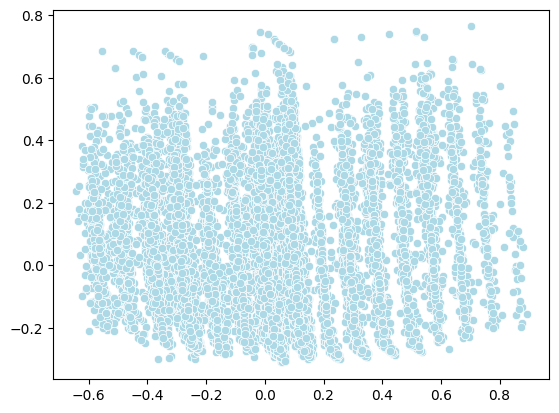

In [139]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], color="lightblue")
plt.show()

In [140]:
y.value_counts()

target
<=50K    24720
>50K      7841
Name: count, dtype: int64

Undersampling utilizando PCA para visualização dos dados

In [141]:
df_random_under = df_scaled_numeric[df_scaled_numeric["target"] == "<=50K"].sample(random_state=42, n=7841)
df_random = pd.concat([df_scaled_numeric[df_scaled_numeric["target"] == ">50K"], df_random_under], axis=0).reset_index(drop=True)

In [142]:
X_random = df_random.drop(columns=["target"])
y_random = df_random["target"]

In [143]:
pca = PCA()
pca.fit(X_random)
threshold = 0.95
inflection_point = None
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, explained_variance_ratio in enumerate(cumulative_explained_variance):
    if explained_variance_ratio >= threshold:
        inflection_point = i
        break

In [144]:
pca = PCA(n_components=inflection_point + 1)
X_pca_random = pca.fit_transform(X_random)

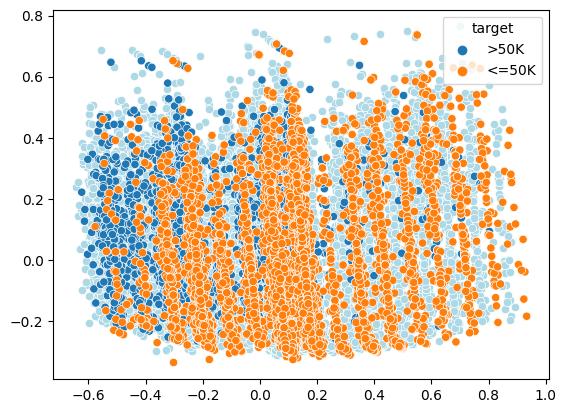

In [145]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], color="lightblue")
sns.scatterplot(x=X_pca_random[:,0], y=X_pca_random[:,1], hue=y_random)
plt.show()

In [146]:
y_random.value_counts()

target
>50K     7841
<=50K    7841
Name: count, dtype: int64

SMOTE utilizando PCA para visualização dos dados

In [147]:
smote = SMOTE(random_state=42)

In [148]:
X_smote, y_smote = smote.fit_resample(X, y)
X.shape, X_smote.shape

((32561, 6), (49440, 6))

In [149]:
pca = PCA()
pca.fit(X_smote)
threshold = 0.95
inflection_point = None
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, explained_variance_ratio in enumerate(cumulative_explained_variance):
    if explained_variance_ratio >= threshold:
        inflection_point = i
        break

In [150]:
pca = PCA(n_components=inflection_point + 1)
X_pca_smote = pca.fit_transform(X_smote)

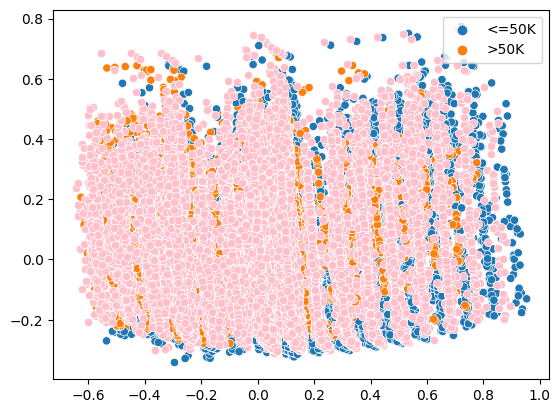

In [151]:
sns.scatterplot(x=X_pca_smote[:,0], y=X_pca_smote[:,1], hue=y_smote)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], color="pink")
plt.show()

In [152]:
y_smote.value_counts()

target
<=50K    24720
>50K     24720
Name: count, dtype: int64

**10. Aplique _One Hot Encoding_ nas variáveis _race_ e _sex_. Junte ao resultado _TODAS_ as outras variáveis númericas (_age_, _education-num_, _capital-gain_, _capital-loss_ e _hours-per-week_). Utilize o dataset resultante no algoritmo t-SNE e reduza a dimensionalidade à 2 componentes (padrão do algoritmo). Plote o resultado diferenciando os pontos pela classe (atributo _target_).**

In [153]:
from sklearn.manifold import TSNE

In [154]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
enconded_colunas = onehot_encoder.fit_transform(df[['race', 'sex']])
nomes_colunas = onehot_encoder.get_feature_names_out(['race', 'sex'])
enc_df = pd.DataFrame(enconded_colunas, columns=nomes_colunas)
enc_df.head()

,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


In [155]:
colunas = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week", "target"]
df_enconded = pd.concat([df[colunas], enc_df], axis=1)
df_enconded.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,target,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,13,2174,0,40,<=50K,0.0,0.0,0.0,1.0,1.0
1,50,13,0,0,13,<=50K,0.0,0.0,0.0,1.0,1.0
2,38,9,0,0,40,<=50K,0.0,0.0,0.0,1.0,1.0
3,53,7,0,0,40,<=50K,0.0,1.0,0.0,0.0,1.0
4,28,13,0,0,40,<=50K,0.0,1.0,0.0,0.0,0.0


In [156]:
X = scaler.fit_transform(df_enconded.drop(columns=["target"]))
y = df_enconded["target"]

In [157]:
model = TSNE(n_components=2, random_state=42)
tsne_data = model.fit_transform(X)
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'target'))

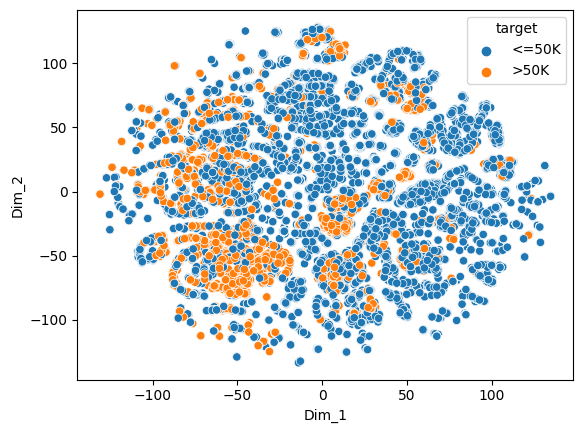

In [158]:
sns.scatterplot(data = tsne_df, x='Dim_1', y= 'Dim_2', hue='target', palette='tab10')
plt.show()